In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy


In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
pip install pycountry

In [ ]:
# Authentication
consumerSecret = ''
consumerKey = ''
accessToken = ''
accessTokenSecret = ''
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
#Sentiment Analysis
import nltk
nltk.download('vader_lexicon')
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
    
 elif pos > neg:
     positive_list.append(tweet.text)
     positive += 1
 
 elif pos == neg:
     neutral_list.append(tweet.text)
     neutral += 1
    
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Please enter keyword or hashtag to search: covid vaccine england
Please enter how many tweets to analyze: 500


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  500
positive number:  213
negative number:  163
neutral number:  124


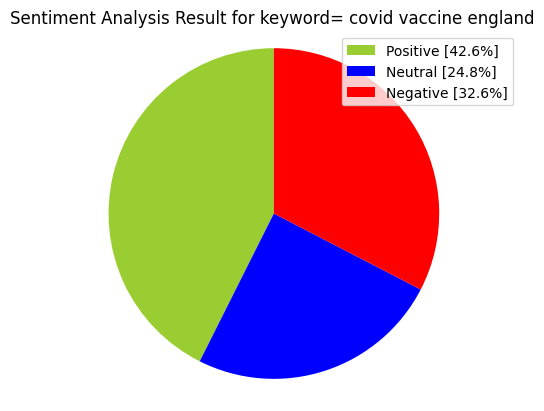

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
tweet_list

,0
0,RT @gkierzek: NHS vaccine mandate set to be dr...
1,RT @BreesAnna: The lifting of Plan B in Englan...
2,RT @LCWF_TBK: @CMO_England Very important. The...
6,RT @soundtrue2: 🚨les vaccins Covid obligatoire...
8,RT @tryingtowrite10: @LCWF_TBK @CMO_England Th...
...,...
456,@CMO_England So endorse the covid vaccine for ...
470,The #NHSMandate was a disaster of an idea from...
476,NHS vaccine mandate: Mandatory Covid jabs for ...
485,@CMO_England Bit like the worst illness in chi...


In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|(\w+:\/\/\S+)","" "",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @gkierzek: NHS vaccine mandate set to be dr...,nhs vaccine mandate set to be dropped as saji...
1,RT @BreesAnna: The lifting of Plan B in Englan...,the lifting of plan b in england means mandat...
2,RT @LCWF_TBK: @CMO_England Very important. The...,_england very important. there is also a covi...
6,RT @soundtrue2: 🚨les vaccins Covid obligatoire...,🚨les vaccins covid obligatoires pour le perso...
8,RT @tryingtowrite10: @LCWF_TBK @CMO_England Th...,_tbk _england there are seven children with c...
13,"RT @54JohnBull: MSM are doing ""fact checking"" ...","msm are doing ""fact checking"" pieces or rogan..."
15,More than one in 10 school entry-age #children...,more than one in 10 school entry-age #children...
16,RT @NHSsoutheast: Nine-year-old Arthur talks a...,nine-year-old arthur talks about getting the ...
18,Javvy Swadjie to scrap Covid vaccine mandate f...,javvy swadjie to scrap covid vaccine mandate f...
19,@ScotsNoLockdown FYI. They can’t tell this. Th...,fyi. they can’t tell this. there has never be...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
  tw_list.loc[index, 'sentiment'] = "positive"
 else:
  tw_list.loc[index, 'sentiment'] = "neutral"
 tw_list.loc[index, 'neg'] = neg
 tw_list.loc[index, 'neu'] = neu
 tw_list.loc[index, 'pos'] = pos
 tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @gkierzek: NHS vaccine mandate set to be dr...,nhs vaccine mandate set to be dropped as saji...,0.00,0.00,negative,0.132,0.868,0.000,-0.4404
1,RT @BreesAnna: The lifting of Plan B in Englan...,the lifting of plan b in england means mandat...,0.00,0.50,positive,0.000,0.937,0.063,0.0387
2,RT @LCWF_TBK: @CMO_England Very important. The...,_england very important. there is also a covi...,0.46,0.70,positive,0.000,0.884,0.116,0.2716
6,RT @soundtrue2: 🚨les vaccins Covid obligatoire...,🚨les vaccins covid obligatoires pour le perso...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
8,RT @tryingtowrite10: @LCWF_TBK @CMO_England Th...,_tbk _england there are seven children with c...,0.40,0.50,neutral,0.000,1.000,0.000,0.0000
13,"RT @54JohnBull: MSM are doing ""fact checking"" ...","msm are doing ""fact checking"" pieces or rogan...",0.30,0.45,positive,0.000,0.863,0.137,0.4019
15,More than one in 10 school entry-age #children...,more than one in 10 school entry-age #children...,0.50,0.50,negative,0.095,0.905,0.000,-0.2732
16,RT @NHSsoutheast: Nine-year-old Arthur talks a...,nine-year-old arthur talks about getting the ...,0.00,0.00,positive,0.000,0.867,0.133,0.3818
18,Javvy Swadjie to scrap Covid vaccine mandate f...,javvy swadjie to scrap covid vaccine mandate f...,0.00,0.00,positive,0.000,0.854,0.146,0.3382
19,@ScotsNoLockdown FYI. They can’t tell this. Th...,fyi. they can’t tell this. there has never be...,0.00,0.30,positive,0.089,0.819,0.092,0.0155


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,32,36.78
negative,31,35.63
neutral,24,27.59


In [ ]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,106.84
neutral,106.75
positive,114.25
